# Basics

In [1]:
%cd -q ../../../src

## Bare

In [2]:
from arche import *

Any project requires auth which is done with an api key set in `SH_APIKEY`

In [3]:
a = Arche("381798/1/1")


Job Outcome:
	Finished

Job Errors:
	No errors

Responses Per Item Ratio:
	Number of responses / Number of scraped items - 1.05

Fields Coverage:
	PASSED




Fields Coverage (1 message(s)):


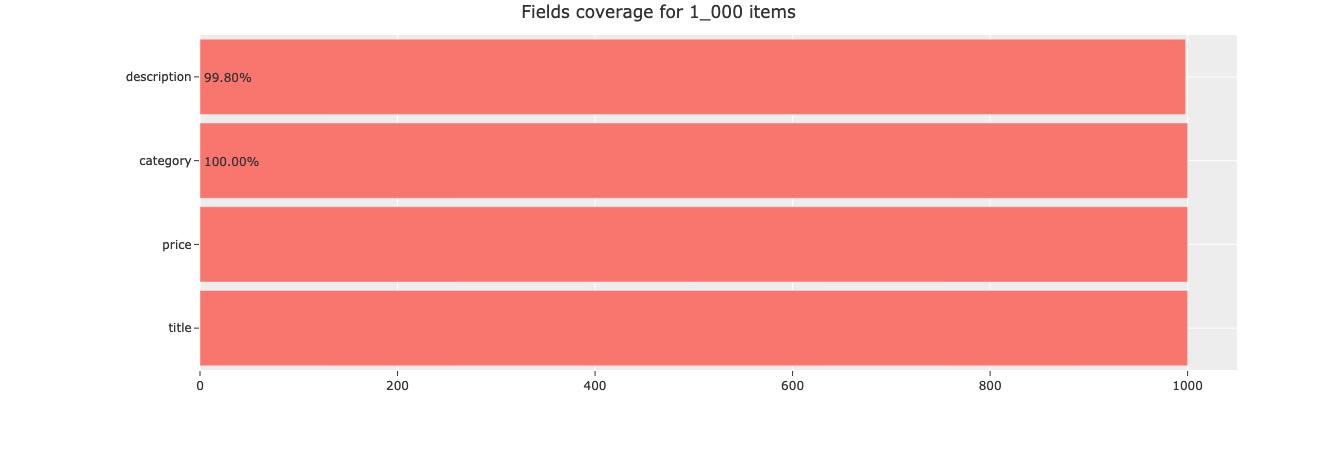

In [4]:
a.report_all()

We just ran a minimal number of rules. The validation can be improved with adding a json schema, let's infer one from the data we already have.

## JSON schema

In [5]:
basic_json_schema("381798/1/1")

{'$schema': 'http://json-schema.org/draft-07/schema#',
 'additionalProperties': False,
 'definitions': {'float': {'pattern': '^-?[0-9]+\\.[0-9]{2}$'},
                 'url': {'pattern': '^https?://(www\\.)?[a-z0-9.-]*\\.[a-z]{2,}([^<>%\\x20\\x00-\\x1f\\x7F]|%[0-9a-fA-F]{2})*$'}},
 'properties': {'_key': {'type': 'string'},
                '_type': {'type': 'string'},
                'category': {'type': 'string'},
                'description': {'type': 'string'},
                'price': {'type': 'string'},
                'title': {'type': 'string'}},
 'required': ['_key', '_type', 'category', 'description', 'price', 'title'],
 'type': 'object'}

By itself a basic schema is not very helpful, but you can update it.

In [6]:
a.source_items.df.head()

,_key,_type,category,description,price,title
0,https://app.scrapinghub.com/p/381798/1/1/item/0,dict,Travel,"“Wherever you go, whatever you do, just . . . ...",£45.17,It's Only the Himalayas
1,https://app.scrapinghub.com/p/381798/1/1/item/1,dict,Politics,Libertarianism isn't about winning elections; ...,£51.33,Libertarianism for Beginners
2,https://app.scrapinghub.com/p/381798/1/1/item/2,dict,Science Fiction,"Andrew Barger, award-winning author and engine...",£37.59,Mesaerion: The Best Science Fiction Stories 18...
3,https://app.scrapinghub.com/p/381798/1/1/item/3,dict,Poetry,"Part fact, part fiction, Tyehimba Jess's much ...",£23.88,Olio
4,https://app.scrapinghub.com/p/381798/1/1/item/4,dict,Music,This is the never-before-told story of the mus...,£57.25,Our Band Could Be Your Life: Scenes from the A...


Looks like `price` can be checked with regex. Let's also add `category` tag which helps to see the distribution in categoric data and `unique` tag to title to ensure there are no duplicates.

In [7]:
a.schema = {
    "$schema": "http://json-schema.org/draft-07/schema#",
    "definitions": {
        "float": {
            "pattern": "^-?[0-9]+\\.[0-9]{2}$"
        },
        "url": {
            "pattern": "^https?://(www\\.)?[a-z0-9.-]*\\.[a-z]{2,}([^<>%\\x20\\x00-\\x1f\\x7F]|%[0-9a-fA-F]{2})*$"
        }
    },
    "additionalProperties": False,
    "type": "object",
    "properties": {
        "category": {"type": "string", "tag": ["category"]},
        "price": {"type": "string", "pattern": "^£\d{2}.\d{2}$"},
        "_type": {"type": "string"},
        "description": {"type": "string"},
        "title": {"type": "string", "tag": ["unique"]},
        "_key": {"type": "string"}
    },
    "required": [
        "_key",
        "_type",
        "category",
        "description",
        "price",
        "title"
    ]
}

In [8]:
a.validate_with_json_schema()



JSON Schema Validation:
	1000 items were checked, 1 error(s)


Or if your job is really big you can use almost 100x faster [backend](https://github.com/horejsek/python-fastjsonschema)

In [9]:
a.glance()



JSON Schema Validation:
	1000 items were checked, 1 error(s)


We already got something! Let's execute the whole thing again to see how `category` tag works.


Job Outcome:
	Finished

Job Errors:
	No errors

Responses Per Item Ratio:
	Number of responses / Number of scraped items - 1.05

Fields Coverage:
	PASSED

JSON Schema Validation:
	1000 items were checked, 1 error(s)

Tags:
	Used - category, unique
	Not used - name_field, product_price_field, product_price_was_field, product_url_field

Compare Price Was And Now:
	product_price_field or product_price_was_field tags were not found in schema

Uniqueness:
	'title' contains 1 duplicated value(s)

Duplicated Items:
	'name_field' and 'product_url_field' tags were not found in schema

Coverage For Scraped Categories:
	50 categories in 'category'




Fields Coverage (1 message(s)):


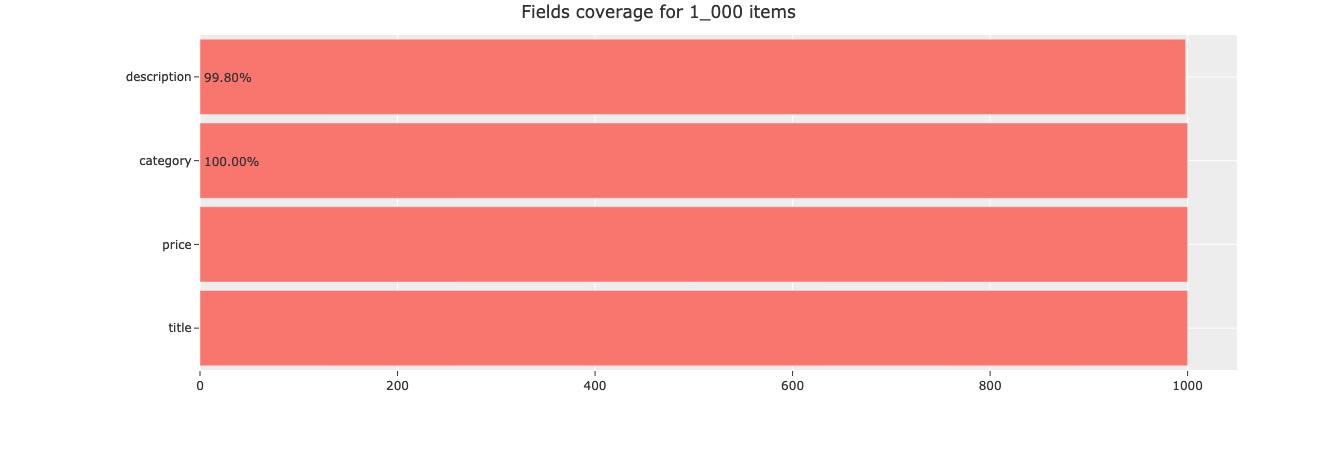


JSON Schema Validation (1 message(s)):



Uniqueness (1 message(s)):



Coverage For Scraped Categories (1 message(s)):


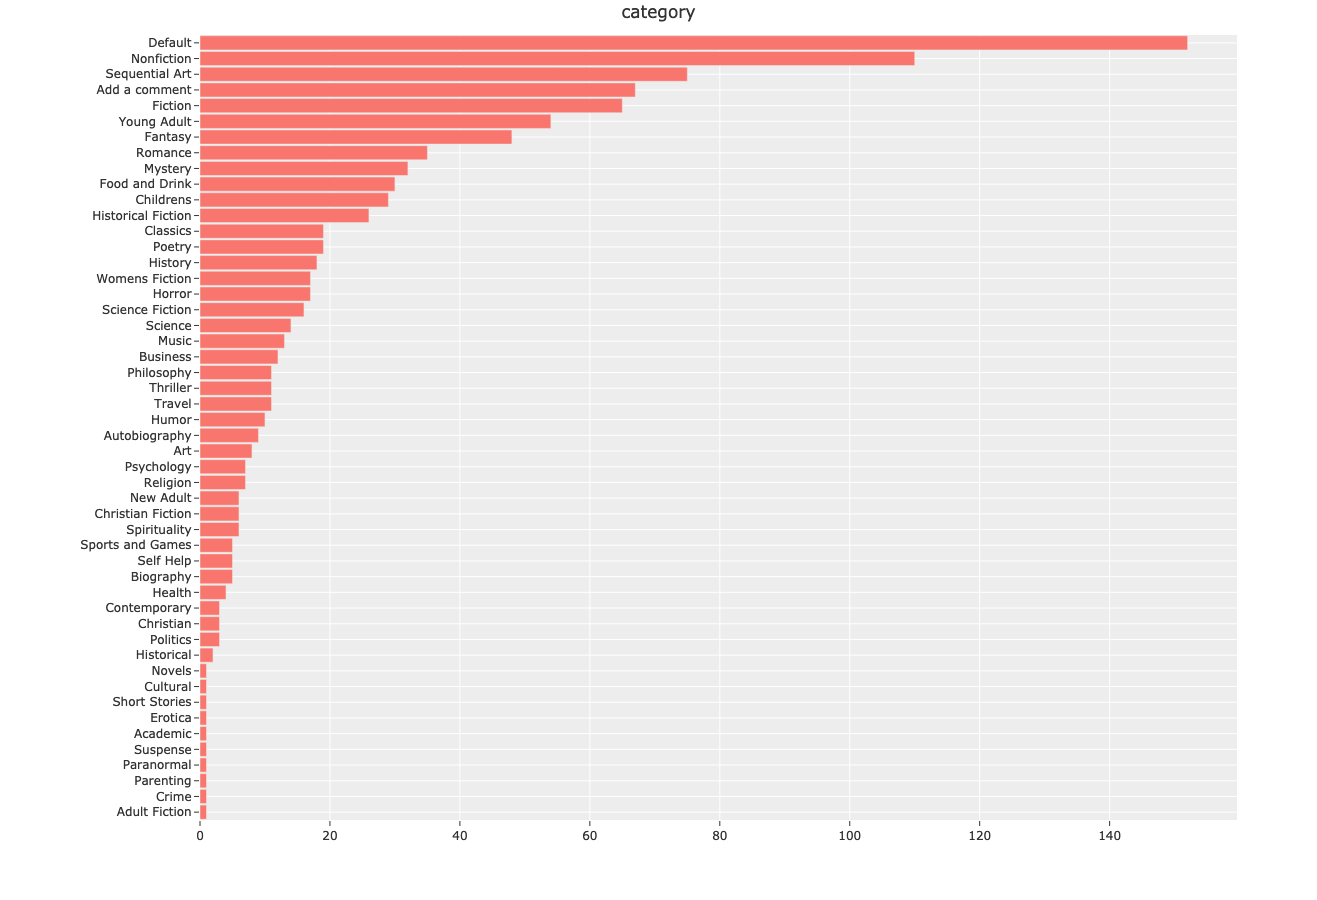

In [10]:
a.report_all()